Olá, Luiz

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição
- Realizou análise exploratória
- Ajustou vários modelos inclusive avaliou OHE
- Calibrou hiperparâmetros

Deixei algumas dicas pontuais. Acho que vale a pena o desafio de escrever em inglês para treinar.
    
Bom trabalho. Parabéns. Desejo sucesso na jornada.
</div>





O serviço de vendas de carros usados Rusty Bargain está desenvolvendo um aplicativo para atrair novos clientes. Nesse aplicativo, você pode descobrir rapidamente o valor de mercado do seu carro. Você tem acesso a dados históricos: especificações técnicas, versões de acabamento e preços. Você precisa construir o modelo para determinar o valor. 

Rusty Bargain está interessado em:

- a qualidade da predição;
- a velocidade da predição;
- o tempo necessário para o treinamento

## Preparação de Dados

In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('/datasets/car_data.csv')

In [3]:
df.head(20)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
5,04/04/2016 17:36,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,04/04/2016 00:00,0,33775,06/04/2016 19:17
6,01/04/2016 20:48,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,01/04/2016 00:00,0,67112,05/04/2016 18:18
7,21/03/2016 18:54,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,21/03/2016 00:00,0,19348,25/03/2016 16:47
8,04/04/2016 23:42,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,04/04/2016 00:00,0,94505,04/04/2016 23:42
9,17/03/2016 10:53,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,17/03/2016 00:00,0,27472,31/03/2016 17:17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower() for col in df.columns]

In [6]:
df.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


Aqui, simplesmente padronizei os nomes das colunas para que fossem separados por "_" e deixei tudo minúsculo

### Excluindo Colunas e Lidando com valores Ausentes

O nosso dataframe tem algumas colunas com valores ausentes, precisamos lidar com todos eles, mas antes, vamos passar um pente na tabela e definir quais colunas não são importantes para as predições dos modelos. Assim, logo de cara excluiremos as colunas: DateCrawled, DateCreated, PostalCode e LastSeen, porque elas são informações operacionais do serviço e não oferecem informações úteis para nosso modelo. Além disso, vamos dar uma olhada mais de perto em NumberOfPictures e RegistrationMonth.

#### Verficiando os valores de NumberofPictures

In [7]:
(df['number_of_pictures'] == 0).all()

True

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Outra forma de fazer é usar value_counts() ou unique()
</div>

Quando olhei a descrição dos dados, em um primeiro momento, achei a coluna desnecessária, mas depois, pensei que é interesante que, quanto maior o valor do produto, maior seja o núkmero de fotos, por isso ia mantê-la. Mas agora percebemos que essa tabela só possui o valor 0. Não há informação relevante e, por isso, ela será excluída.

#### testando a Importãncia de registration_month

In [8]:
df[['registration_month', 'price']].corr()

,registration_month,price
registration_month,1.000000,0.110581
price,0.110581,1.000000


O ano de registro de um carro pode ser relevante. Já o seu mês? Nem tanto... Essa correlação fraca nos mostra que a coluna também pode ser ignorada. Vamos remov~e-la também. 

In [9]:
columns_to_drop = [
    "number_of_pictures",
    "date_crawled",
    "date_created",
    "postal_code",
    "last_seen",
    "registration_month"
]

df.drop(columns=columns_to_drop, inplace=True)

In [10]:
df.head()

,price,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              354369 non-null  int64 
 1   vehicle_type       316879 non-null  object
 2   registration_year  354369 non-null  int64 
 3   gearbox            334536 non-null  object
 4   power              354369 non-null  int64 
 5   model              334664 non-null  object
 6   mileage            354369 non-null  int64 
 7   fuel_type          321474 non-null  object
 8   brand              354369 non-null  object
 9   not_repaired       283215 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


### Voltando aos Valores Ausentes das Colunas Remanescentes

In [12]:
cols_to_fill = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'not_repaired']

for col in cols_to_fill:
    df[col].fillna('desconhecido', inplace=True)

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

'not_repaired' tende a ser booleano. Convém avaliar a porcentagem de casos ausentes e decidir se mantém com imputação mais adequada (substituir pela moda) ou se descartamos a coluna
</div>

Para todas as outras colunas, preferi preencher os valores ausentes como desconhecido. Se retirássemos as linhas, perderíamos muita informação para nossos modelos. Adicionar moda também é ruim, porque preencheríamos diversas variáveis de forma errada, trazendo muito viés para os nossos modelos. Nossa abordagem preserva os dados sem impactar negativamente no trabalho dos algoritmos.

### Limpando Dados Absurdos

#### Registration_year

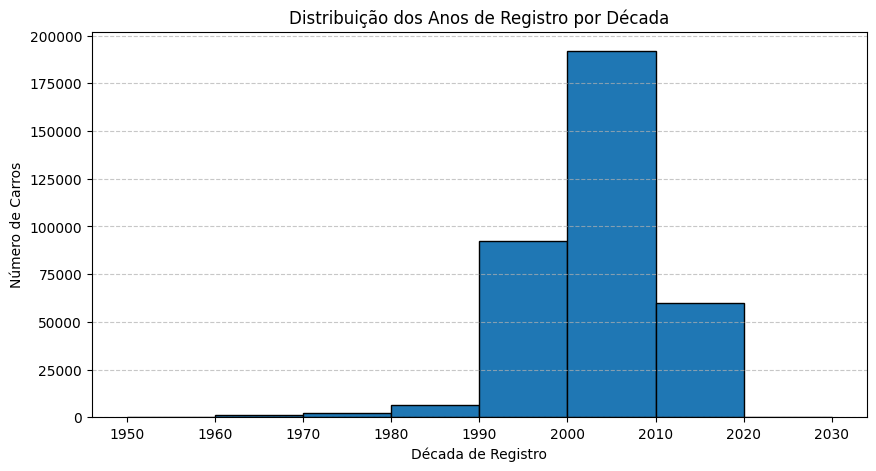

In [13]:
bins = np.arange(1950, 2031, 10)  # De 1950 a 2030, com intervalo de 10 anos

plt.figure(figsize=(10,5))
plt.hist(df['registration_year'], bins=bins, edgecolor='black')

plt.xticks(bins)

plt.xlabel("Década de Registro")
plt.ylabel("Número de Carros")
plt.title("Distribuição dos Anos de Registro por Década")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Essa coluna contém alguns valores absurdos que precisamos eliminar. Para decidirmos o que fazer, criei o gráfico que nos indica o volume de carros registrado em cada década. baseado no que ele apresenta, decidi que um bom filtro de valores aceitáveis vai de 1960 até 2025, ano em que estamos agora.

In [14]:
out_of_range = df[(df['registration_year'] < 1960) | (df['registration_year'] > 2025)].shape[0]

print(f"Linhas fora do intervalo 1960-2025: {out_of_range}")

Linhas fora do intervalo 1960-2025: 527


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Usar o IQR ou z-score é uma técnica mais adequada para identificar outlier, pois análise visual é subjetivo
</div>

Aqui, temos 527 linhas. Esse é um valor muito pequeno. Foi bom não termos removido nenhuma linha até agora, porque, agora, temos mais liberdade de fazer isso. Melhor do que adicionar qualquer viés e retirar fora esses valores absurdos. 

In [15]:
df = df[(df['registration_year'] >= 1960) & (df['registration_year'] <= 2025)]

#### power

In [16]:
zero_power_count = df[df['power'] == 0].shape[0]

high_power_count = df[df['power'] > 600].shape[0]

print(f"Quantidade de carros com potência 0: {zero_power_count}")
print(f"Quantidade de carros com potência acima de 600 HP: {high_power_count}")

Quantidade de carros com potência 0: 39903
Quantidade de carros com potência acima de 600 HP: 370


Nenhum carro tem 0 de potência. Temos que trabalhar esse valor, mas não podemos excluir, porque quase 40 mil linhas seria uma perda muito impactante no dataset. Aqui será necessário algum viés, mas vamos calcular as medianas dos modelos e usálas para preencher os valores 0. Na falta de um modelo, usaremos a mediana da marca. O limite de potncia máximo de 600 também foi uma boa escolha. Poucos carros estão acima. Esses outliers serão excluídos.

In [17]:
model_median_power = df[df['power'] > 0].groupby('model')['power'].median()

brand_median_power = df[df['power'] > 0].groupby('brand')['power'].median()

def fill_power(row):
    if row['power'] == 0:
        if row['model'] in model_median_power:
            return model_median_power[row['model']]
        elif row['brand'] in brand_median_power:
            return brand_median_power[row['brand']]
    return row['power']

df['power'] = df.apply(fill_power, axis=1)

In [18]:
zero_power_count = (df['power'] == 0).sum()

print(f"Quantidade de carros com potência 0 após a substituição: {zero_power_count}")

Quantidade de carros com potência 0 após a substituição: 0


In [19]:
df = df[df['power'] <= 600]

print(f"Maior potência no dataset após a remoção: {df['power'].max()}")

Maior potência no dataset após a remoção: 600.0


#### Price

In [20]:
zero_price_count = df[df['price'] == 0].shape[0]
print(f"Quantidade de carros com price == 0: {zero_price_count}")

Quantidade de carros com price == 0: 10650


Mais de 10 mil linhas estão com preços zerados. Ninguém cria um anúncio para dar o carro de graça dessa forma. Esses valores representam cerca de 3% do dataset. 

In [21]:
price_percentiles = df['price'].quantile([0.90, 0.95, 0.99, 0.999])

print(price_percentiles)

0.900    11450.0
0.950    14600.0
0.990    18800.0
0.999    19999.0
Name: price, dtype: float64


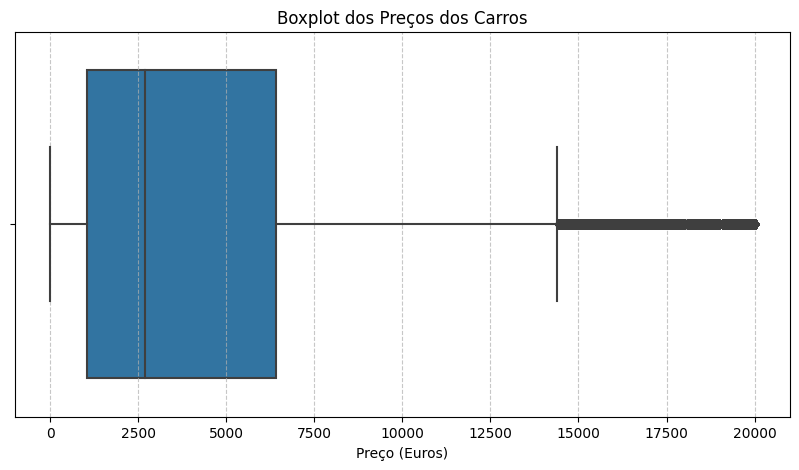

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])

plt.xlabel("Preço (Euros)")
plt.title("Boxplot dos Preços dos Carros")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

Aqui confirmamos um boxplot para verificar a exist~encia de outliers. Mas esses valores destoam um pouco da maioria dos preços, mas não estão fora de contexto. Carros usados nessa faixa podem existir sem problemas. tratá-los além disso me parece adicionar um viés desnecessário aos dados. Vamos apenas remover as linhas zeradas, entendendo que ninguém daria o carro de graça e que esses valores são, muito provavelmente erros ou anúncios incompletos.

In [23]:
df = df[df['price'] > 0]

## Treinamento do modelo

Finalmente podemos começar essa etapa do trabalho. Para essa etapa, treinaremos uma Floresta Aleatória, uma Regressão Linear, um XGboost e um CatBoost. Nossos próximos passos são dividir o dataset em conjunto de treinamento e teste, usar o OHE para o XGBoost e aplicar a escalabilidade, que usaremos por padrão.

In [24]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [25]:
categorical_cols = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']
numerical_cols = ['registration_year', 'power', 'mileage']

X_train_ohe = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

X_test_ohe = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
X_test_ohe = X_test_ohe.reindex(columns=X_train_ohe.columns, fill_value=0)

In [26]:
scaler = StandardScaler()
X_train_ohe[numerical_cols] = scaler.fit_transform(X_train_ohe[numerical_cols])
X_test_ohe[numerical_cols] = scaler.transform(X_test_ohe[numerical_cols])

# Conferir as formas
print(f"X_train shape: {X_train_ohe.shape}")
print(f"X_test shape: {X_test_ohe.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (274257, 310)
X_test shape: (68565, 310)
y_train shape: (274257,)
y_test shape: (68565,)


### Floresta Aleatória

In [66]:
start_time = time.time()

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=12345
)

rf_model.fit(X_train_ohe, y_train)

y_pred_rf = rf_model.predict(X_test_ohe)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

end_time = time.time()
rf_training_time = end_time - start_time

print(f"RandomForest RMSE: {rmse_rf:.2f}")
print(f"Tempo de treinamento: {rf_training_time:.2f} segundos")

RandomForest RMSE: 1926.74
Tempo de treinamento: 208.53 segundos


#### procurando os melhores parâmetros

A próxima célula levou cerca de 45 minutos para rodar. O resultado de RMSE apresentou uma melhora e, dessa forma, encontramos o melhor parâmetro para a Floresta aleatória, estou deixando o código onde eu usei o Randomized Search para encontrar o melhor parâmetro comentado, para que possa ser avaliado, mas que não seja necessário rodar mais uma vez. Os resultados estão na célula markdown seguinte. Na sequência, vou só treinar uma floresta aleatória diretamente com os melhores parâmetros obtidos

In [68]:
"""param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árvores
    'max_depth': [5, 10, 15],  # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10]  # Mínimo de amostras para dividir um nó
}

rf_base = RandomForestRegressor(random_state=12345)

rf_search = RandomizedSearchCV(
    rf_base, param_grid, n_iter=5, cv=3, 
    scoring='neg_root_mean_squared_error', random_state=12345, n_jobs=-1
)

start_time = time.time()

rf_search.fit(X_train_ohe, y_train)

end_time = time.time()
rf_optimization_time = end_time - start_time

print("Melhores Hiperparâmetros:", rf_search.best_params_)

best_rf_model = rf_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_ohe)
rmse_best_rf = mean_squared_error(y_test, y_pred_best_rf, squared=False)

print(f"RMSE com melhores hiperparâmetros: {rmse_best_rf:.2f}")
print(f"Tempo total de otimização: {rf_optimization_time:.2f} segundos")"""

Melhores Hiperparâmetros: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 15}
RMSE com melhores hiperparâmetros: 1710.45
Tempo total de otimização: 2628.09 segundos


Melhores Hiperparâmetros: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 15}
RMSE com melhores hiperparâmetros: 1710.45
Tempo total de otimização: 2628.09 segundos

In [70]:
start_time = time.time()

rf_optimized = RandomForestRegressor(
    n_estimators=200, 
    max_depth=15, 
    min_samples_split=5, 
    random_state=12345
)

rf_optimized.fit(X_train_ohe, y_train)

y_pred_rf_optimized = rf_optimized.predict(X_test_ohe)

rmse_rf_optimized = mean_squared_error(y_test, y_pred_rf_optimized, squared=False)

end_time = time.time()
rf_final_training_time = end_time - start_time

print(f"RandomForest (ajustado) RMSE: {rmse_rf_optimized:.2f}")
print(f"Tempo de treinamento: {rf_final_training_time:.2f} segundos")

RandomForest (ajustado) RMSE: 1710.45
Tempo de treinamento: 481.68 segundos


Finalizamos o treinamento da Floresta Aleatória. Form cerca de oito minutos para o último treino, com um RMSE de 1710.45

### CatBoost

In [72]:
start_time = time.time()

cat_model = CatBoostRegressor(
    iterations=1000,
    depth=10,
    learning_rate=0.1,
    l2_leaf_reg=3,
    loss_function='RMSE',
    random_seed=12345,
    cat_features=categorical_cols,
    verbose=100
)

cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)

rmse_cat = mean_squared_error(y_test, y_pred_cat, squared=False)

end_time = time.time()
cat_training_time = end_time - start_time

print(f"CatBoost RMSE: {rmse_cat:.2f}")
print(f"Tempo de treinamento: {cat_training_time:.2f} segundos")

0:	learn: 4194.4158428	total: 659ms	remaining: 10m 58s
100:	learn: 1668.1130568	total: 52.8s	remaining: 7m 50s
200:	learn: 1577.0404522	total: 1m 48s	remaining: 7m 9s
300:	learn: 1527.8550904	total: 2m 44s	remaining: 6m 22s
400:	learn: 1492.2149965	total: 3m 40s	remaining: 5m 29s
500:	learn: 1465.6429233	total: 4m 37s	remaining: 4m 36s
600:	learn: 1442.7987210	total: 5m 34s	remaining: 3m 41s
700:	learn: 1423.7488215	total: 6m 31s	remaining: 2m 46s
800:	learn: 1405.2408680	total: 7m 29s	remaining: 1m 51s
900:	learn: 1388.1571964	total: 8m 25s	remaining: 55.6s
999:	learn: 1373.8391704	total: 9m 22s	remaining: 0us
CatBoost RMSE: 1570.20
Tempo de treinamento: 566.50 segundos


#### procurando os melhores parâmetros

In [ ]:
"""cat_params = {
    'iterations': [500, 1000],
    'depth': [6, 10],
    'learning_rate': [0.05, 0.1],
    'l2_leaf_reg': [3, 5],
}

# Criar modelo base
cat_model = CatBoostRegressor(
    loss_function='RMSE',
    random_seed=12345,
    cat_features=categorical_cols,
    verbose=100
)

start_time = time.time()

grid_search_result = cat_model.grid_search(
    cat_params, 
    X_train, y_train, 
    cv=3
)

end_time = time.time()
cat_optimization_time = end_time - start_time

print("Melhores Hiperparâmetros:", grid_search_result['params'])
print(f"Tempo total de otimização: {cat_optimization_time:.2f} segundos")"""

A célula comentada acima traz o código que identifica os melhores parâmetros do CatBoost. Os parâmetros apresentados no resultado foram: Melhores Hiperparâmetros: {'depth': 10, 'l2_leaf_reg': 3, 'iterations': 1000, 'learning_rate': 0.1}. Essa célula teve tempo de execução de cerca de 1h10min. Agora, podemos treinar o modelo com os melhores parâmetros e encontrar o tempo total de treinamento.

In [74]:
start_time = time.time()

best_cat_model = CatBoostRegressor(
    depth=10, 
    l2_leaf_reg=3, 
    iterations=1000, 
    learning_rate=0.1, 
    loss_function='RMSE', 
    random_seed=12345,
    cat_features=categorical_cols,
    verbose=100
)

best_cat_model.fit(X_train, y_train)

end_time = time.time()
cat_final_training_time = end_time - start_time

y_pred_best_cat = best_cat_model.predict(X_test)

rmse_best_cat = mean_squared_error(y_test, y_pred_best_cat, squared=False)

print(f"CatBoost RMSE (ajustado): {rmse_best_cat:.2f}")
print(f"Tempo de treinamento: {cat_final_training_time:.2f} segundos")

0:	learn: 4194.4158428	total: 562ms	remaining: 9m 21s
100:	learn: 1668.1130568	total: 53s	remaining: 7m 51s
200:	learn: 1577.0404522	total: 1m 48s	remaining: 7m 11s
300:	learn: 1527.8550904	total: 2m 45s	remaining: 6m 23s
400:	learn: 1492.2149965	total: 3m 41s	remaining: 5m 30s
500:	learn: 1465.6429233	total: 4m 37s	remaining: 4m 36s
600:	learn: 1442.7987210	total: 5m 34s	remaining: 3m 42s
700:	learn: 1423.7488215	total: 6m 31s	remaining: 2m 47s
800:	learn: 1405.2408680	total: 7m 30s	remaining: 1m 51s
900:	learn: 1388.1571964	total: 8m 27s	remaining: 55.7s
999:	learn: 1373.8391704	total: 9m 24s	remaining: 0us
CatBoost RMSE (ajustado): 1570.20
Tempo de treinamento: 567.45 segundos


### LightGBM

In [77]:
start_time = time.time()

lgb_model = lgb.LGBMRegressor(
    objective='regression',
    metric='rmse',
    random_state=12345
)

lgb_model.fit(X_train_ohe, y_train)

end_time = time.time()
lgb_training_time = end_time - start_time

y_pred_lgb = lgb_model.predict(X_test_ohe)

rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)

print(f"LightGBM RMSE (básico): {rmse_lgb:.2f}")
print(f"Tempo de treinamento: {lgb_training_time:.2f} segundos")

LightGBM RMSE (básico): 1726.35
Tempo de treinamento: 4.44 segundos


Um modelo que já superou a Floresta aleatória básica ao passo que traz um tempo de treinamento absurdamente menor. Vamos trabalhar em cima desses hiperparametros para ver se melhorams esse RMSE

#### Procurando os melhores hiperparametros

In [82]:
"""lgb_params = {
    'num_leaves': [31, 50],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [500, 1000],
    'max_depth': [10, 15],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1]
}

lgb_model = lgb.LGBMRegressor(objective='regression', metric='rmse', random_state=12345)

grid_search = GridSearchCV(
    estimator=lgb_model, 
    param_grid=lgb_params, 
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=3,
    n_jobs=-1
)

start_time = time.time()

grid_search.fit(X_train_ohe, y_train)

end_time = time.time()
lgb_optimization_time = end_time - start_time

best_lgb_params = grid_search.best_params_

print("Melhores Hiperparâmetros:", best_lgb_params)
print(f"Tempo total de otimização: {lgb_optimization_time:.2f} segundos")"""

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3] END learning_rate=0.05, max_depth=10, n_estimators=500, num_leaves=31, reg_alpha=0, reg_lambda=0; total time=  14.4s
[CV 2/3] END learning_rate=0.05, max_depth=10, n_estimators=500, num_leaves=31, reg_alpha=0, reg_lambda=0; total time=  12.7s
[CV 3/3] END learning_rate=0.05, max_depth=10, n_estimators=500, num_leaves=31, reg_alpha=0, reg_lambda=0; total time=  12.6s
[CV 1/3] END learning_rate=0.05, max_depth=10, n_estimators=500, num_leaves=31, reg_alpha=0, reg_lambda=0.1; total time=  13.2s
[CV 2/3] END learning_rate=0.05, max_depth=10, n_estimators=500, num_leaves=31, reg_alpha=0, reg_lambda=0.1; total time=  13.4s
[CV 3/3] END learning_rate=0.05, max_depth=10, n_estimators=500, num_leaves=31, reg_alpha=0, reg_lambda=0.1; total time=  13.0s
[CV 1/3] END learning_rate=0.05, max_depth=10, n_estimators=500, num_leaves=31, reg_alpha=0.1, reg_lambda=0; total time=  13.1s
[CV 2/3] END learning_rate=0.05, max_depth=10, n

[CV 2/3] END learning_rate=0.05, max_depth=15, n_estimators=500, num_leaves=50, reg_alpha=0, reg_lambda=0.1; total time=  16.0s
[CV 3/3] END learning_rate=0.05, max_depth=15, n_estimators=500, num_leaves=50, reg_alpha=0, reg_lambda=0.1; total time=  15.8s
[CV 1/3] END learning_rate=0.05, max_depth=15, n_estimators=500, num_leaves=50, reg_alpha=0.1, reg_lambda=0; total time=  16.1s
[CV 2/3] END learning_rate=0.05, max_depth=15, n_estimators=500, num_leaves=50, reg_alpha=0.1, reg_lambda=0; total time=  15.8s
[CV 3/3] END learning_rate=0.05, max_depth=15, n_estimators=500, num_leaves=50, reg_alpha=0.1, reg_lambda=0; total time=  15.8s
[CV 1/3] END learning_rate=0.05, max_depth=15, n_estimators=500, num_leaves=50, reg_alpha=0.1, reg_lambda=0.1; total time=  16.2s
[CV 2/3] END learning_rate=0.05, max_depth=15, n_estimators=500, num_leaves=50, reg_alpha=0.1, reg_lambda=0.1; total time=  16.1s
[CV 3/3] END learning_rate=0.05, max_depth=15, n_estimators=500, num_leaves=50, reg_alpha=0.1, reg_l

[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=1000, num_leaves=31, reg_alpha=0.1, reg_lambda=0.1; total time=  21.2s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=1000, num_leaves=31, reg_alpha=0.1, reg_lambda=0.1; total time=  21.4s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=1000, num_leaves=31, reg_alpha=0.1, reg_lambda=0.1; total time=  20.4s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=1000, num_leaves=50, reg_alpha=0, reg_lambda=0; total time=  26.2s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=1000, num_leaves=50, reg_alpha=0, reg_lambda=0; total time=  25.0s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=1000, num_leaves=50, reg_alpha=0, reg_lambda=0; total time=  25.5s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=1000, num_leaves=50, reg_alpha=0, reg_lambda=0.1; total time=  25.3s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=1000, num_leaves=50, reg_alpha=0, reg_lambda=

Encontramos os parametros e o tempo de execução desse treinamento. Eles são: Melhores Hiperparâmetros: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 1000, 'num_leaves': 50, 'reg_alpha': 0.1, 'reg_lambda': 0}
Tempo total de otimização: 6694.39 segundos. Aproximadamente 1h51 minutos de trabalho, mas podemos, finalmente, finalizar o treino desse modelo. Como nos outros casos, vou manter o código comentado, para que não seja necessário executá-lo novamente na avaliação do projeto.

In [83]:
start_time = time.time()

best_lgb_model = lgb.LGBMRegressor(
    learning_rate=0.1,
    max_depth=15,
    n_estimators=1000,
    num_leaves=50,
    reg_alpha=0.1,
    reg_lambda=0,
    objective='regression',
    metric='rmse',
    random_state=12345
)

best_lgb_model.fit(X_train_ohe, y_train)

end_time = time.time()
lgb_training_time = end_time - start_time

y_pred_best_lgb = best_lgb_model.predict(X_test_ohe)

rmse_best_lgb = mean_squared_error(y_test, y_pred_best_lgb, squared=False)

print(f"LightGBM RMSE (ajustado): {rmse_best_lgb:.2f}")
print(f"Tempo de treinamento: {lgb_training_time:.2f} segundos")

LightGBM RMSE (ajustado): 1566.78
Tempo de treinamento: 34.59 segundos


### Regressão Linear

In [28]:
start_time = time.time()

lr_model = LinearRegression()
lr_model.fit(X_train_ohe, y_train)

end_time = time.time()
lr_training_time = end_time - start_time

y_pred_lr = lr_model.predict(X_test_ohe)

rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

print(f"Regressão Linear RMSE: {rmse_lr:.2f}")
print(f"Tempo de treinamento: {lr_training_time:.2f} segundos")

Regressão Linear RMSE: 2628.22
Tempo de treinamento: 10.56 segundos


In [29]:
lr_params = {
    'fit_intercept': [True, False],  # Testar com e sem intercepto
    'positive': [True, False]  # Testar se forçamos coeficientes positivos
}

lr_model = LinearRegression()

grid_search_lr = GridSearchCV(
    estimator=lr_model, 
    param_grid=lr_params, 
    scoring='neg_root_mean_squared_error', 
    cv=3,
    verbose=3
)

start_time = time.time()
grid_search_lr.fit(X_train_ohe, y_train)
end_time = time.time()
lr_optimization_time = end_time - start_time

best_lr_params = grid_search_lr.best_params_

print("Melhores Hiperparâmetros:", best_lr_params)
print(f"Tempo total de otimização: {lr_optimization_time:.2f} segundos")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ..............fit_intercept=True, positive=True; total time=  21.9s
[CV 2/3] END ..............fit_intercept=True, positive=True; total time=  21.9s
[CV 3/3] END ..............fit_intercept=True, positive=True; total time=  21.9s
[CV 1/3] END .............fit_intercept=True, positive=False; total time=   7.0s
[CV 2/3] END .............fit_intercept=True, positive=False; total time=   7.2s
[CV 3/3] END .............fit_intercept=True, positive=False; total time=   7.1s
[CV 1/3] END .............fit_intercept=False, positive=True; total time=  21.7s
[CV 2/3] END .............fit_intercept=False, positive=True; total time=  21.6s
[CV 3/3] END .............fit_intercept=False, positive=True; total time=  21.4s
[CV 1/3] END ............fit_intercept=False, positive=False; total time=   7.1s
[CV 2/3] END ............fit_intercept=False, positive=False; total time=   7.2s
[CV 3/3] END ............fit_intercept=False, pos

In [30]:
start_time = time.time()

best_lr_model = LinearRegression(fit_intercept=True, positive=False)

best_lr_model.fit(X_train_ohe, y_train)

end_time = time.time()
lr_training_time = end_time - start_time

y_pred_best_lr = best_lr_model.predict(X_test_ohe)

rmse_best_lr = mean_squared_error(y_test, y_pred_best_lr, squared=False)

print(f"Regressão Linear RMSE (ajustado): {rmse_best_lr:.2f}")
print(f"Tempo de treinamento: {lr_training_time:.2f} segundos")

Regressão Linear RMSE (ajustado): 2628.22
Tempo de treinamento: 10.55 segundos


De longe, nossos piores resultados. Isso era previsível e o próprio projeto já apontava a Regressão Linear como um modelo para tirar prova. Com isso, terminamos a etapa de treinamento dos modelos. 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Dica: Não há necessidade de treinar novamente com os melhores parâmetros pois o GridSearchCV salva para você no atributo best_estimator_. Não sei se você treinou novamente para pegar o tempo
</div>

## Análise do modelo

Bom, com isso, finalizamos mais um projeto. Tínhamos o objetivo de treinar diferentes tipos de algoritmo para que ele pudesse prever o preço de um veículo. Precisavamos do RMSE e do tempo de treinamento como métricas de avaliação. E foi isso que fizemos. na etapa de preparação de dados, tivemos que determinar quais colunas seriam relevantes ao trabalho e quais só adicionariam um peso desnecessário aos nossos modelos. Excluímos tudo que consideramos desnecessário e garantimos que todos os dados ausentes fossem devidamente tratados para começar. 

Em seguida, iniciamos nosso treinamento. Seguindo as especificações, treinamos uma Floresta Aleatória, Um Catboost, um LightGBM e uma Regressão Linear. O processo para encontrar os melhores hiperparâmetros foi o mais demorado. O lightGBM levou quase duas horas para finalizar esse processo. Ainda assim, quando restringimos a tempo de treinamento do modelo, exclusivamente, ele teve um excelente desempenho, finalizando o treinamento em 34.59 segundos e apresentando o melhor RMSE com certa folga (1566.78). 

O Catboost teve uma precisão próxima, alcançando 1570.20, mas precisou de maistempo de treino. A nossa floresta aleatória ficou em terceiro lugar com 1710 de RMSE e um tempo de 8 minutos. Como era esperado, a Regressão linear não era uma boa alternativa para a tarefa e fcou clara diferença dela para todos os outros modelos, algo que o projeto parecia querer evidenciar desde o início, basedo na descrição que temos. Bom, finalizamos com o LightGBM como a melhor escolha tanto em tempo quanto em RMSE.


Modelo                  RMSE (Erro Médio)    Tempo de Treinamento
RandomForest (padrão)   1926.74              208.53seg (~3,5 min)
RandomForest (ajustado) 1710.45              481.68seg (~8 min)
CatBoost (padrão)       1570.20              566.50seg (~9,5 min)
CatBoost (ajustado)     1570.20              567.45seg (~9,5 min)
LightGBM (básico)       1726.35              4.44 seg 
LightGBM (ajustado)     1566.78              34.59 seg 
Regressão Linear        2628.22              10.55 seg

# Checklist

Digite 'x' para verificar. Em seguida, pressione Shift + Enter.

- [x]  O Jupyter Notebook está aberto
- [x ]  O código está livre de erros
- [x ]  As células com o código foram organizadas em ordem de execução
- [ x]  Os dados foram baixados e preparados
- [x ]  Os modelos foram treinados
- [x ]  A análise de velocidade e qualidade dos modelos foi realizada